In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [1]:
import pandas as pd
df = pd.read_excel('https://drive.google.com/uc?export=download&id=1H1-zDfnPQRX_IZusWPqhgDb2nsww5s7s')

In [2]:
df.head()

,Temperatur Udara (°C),Kecepatan Angin (km/jam),Klasifikasi atau Persepsi Marry
0,10,0,Dingin
1,25,0,Panas
2,15,5,Dingin
3,20,3,Panas
4,18,7,Dingin


In [7]:
# Data uji
x_test = np.array([16, 3])

# Hitung jarak
df["Jarak"] = np.sqrt((df["Temperatur Udara (°C)"] - x_test[0])**2 + (df["Kecepatan Angin (km/jam)"] - x_test[1])**2)

# Urutkan berdasarkan jarak
df_sorted = df.sort_values("Jarak")
df_sorted

,Temperatur Udara (°C),Kecepatan Angin (km/jam),Klasifikasi atau Persepsi Marry,Jarak
2,15,5,Dingin,2.236068
3,20,3,Panas,4.000000
4,18,7,Dingin,4.472136
6,22,5,Panas,6.324555
0,10,0,Dingin,6.708204
5,20,10,Dingin,8.062258
7,24,6,Panas,8.544004
1,25,0,Panas,9.486833


In [8]:
# Menggunakan K = 3
K = 3

neighbors = df_sorted.head(K)
neighbors

,Temperatur Udara (°C),Kecepatan Angin (km/jam),Klasifikasi atau Persepsi Marry,Jarak
2,15,5,Dingin,2.236068
3,20,3,Panas,4.000000
4,18,7,Dingin,4.472136


In [10]:
hasil_manual = neighbors["Klasifikasi atau Persepsi Marry"].value_counts().idxmax()
hasil_manual

'Dingin'

In [14]:
X = df[["Temperatur Udara (°C)", "Kecepatan Angin (km/jam)"]]
y = df["Klasifikasi atau Persepsi Marry"]

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

# Masukkan data untuk prediksi dalam bentuk DataFrame yang memiliki nama kolom yang sama dengan X
model.predict(pd.DataFrame([[16, 3]], columns=X.columns))

array(['Dingin'], dtype=object)

In [15]:
accuracies = {}
for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=4)
    accuracies[k] = scores.mean()

accuracies

{1: np.float64(1.0), 3: np.float64(0.875), 5: np.float64(0.75)}

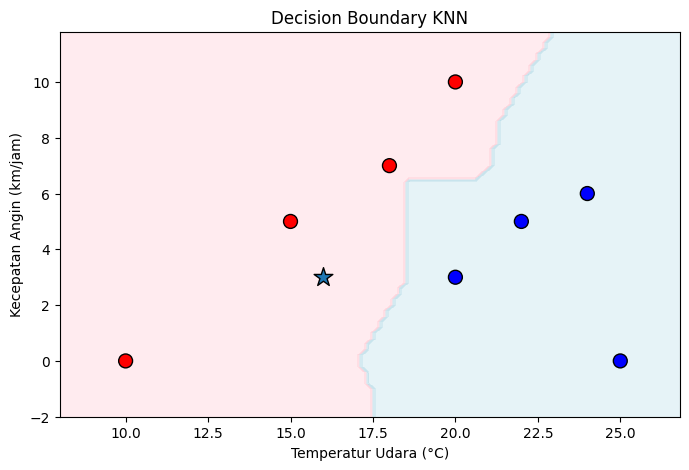

In [25]:
X_plot = df[["Temperatur Udara (°C)", "Kecepatan Angin (km/jam)"]].values
y_plot = np.where(df["Klasifikasi atau Persepsi Marry"] == "Panas", 1, 0)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_plot, y_plot)

x_min, x_max = X_plot[:,0].min()-2, X_plot[:,0].max()+2
y_min, y_max = X_plot[:,1].min()-2, X_plot[:,1].max()+2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

from matplotlib.colors import ListedColormap
# Warna Background
cmap_background = ListedColormap(['#FFC0CB', '#ADD8E6'])

# Warna Titikk Data
cmap_data_points = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8,5))

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap=cmap_data_points, edgecolor='k', s=100)

# Warna Bintang
plt.scatter(16, 3, marker='*', s=200, edgecolors='black')

plt.xlabel("Temperatur Udara (°C)")
plt.ylabel("Kecepatan Angin (km/jam)")
plt.title("Decision Boundary KNN")
plt.show()